In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

In [57]:
def denoise(im):
    f = np.fft.fft2(im)
    f = np.fft.fftshift(f)
    plt.imshow(np.log(f).real,cmap='gray')
    w = f.shape[0]
    h = f.shape[1]
    
    x = 1
    center = np.zeros((x, x))
    center = f[w//2-x:w//2+x, h//2-x:h//2+x]
    f = f
    f[w//2-x:w//2+x, :] = 0
    f[:, h//2-x:h//2+x] = 0
    f[w//2-x:w//2+x, h//2-x:h//2+x] = center

    return f

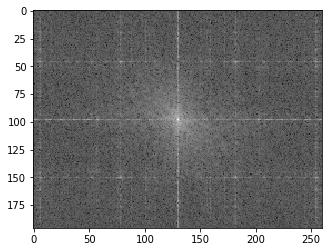

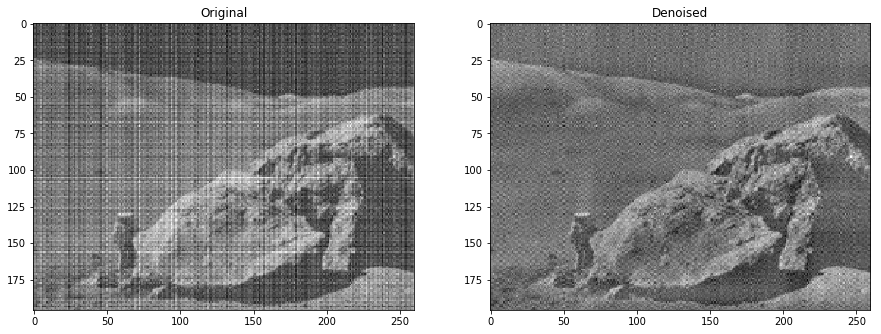

In [58]:
im = cv2.imread("../input_data/land.png",0)
out = denoise(im)

out = np.fft.ifft2(np.fft.ifftshift(out)).real

fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title("Original")
plt.subplot(122)
plt.imshow(out,cmap='gray')
plt.title("Denoised")
plt.show()